# Daten einlesen

Datensatz mit 23.486 Kundenbewertungen in textueller und numerischer Form

https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
import pandas
t = pandas.read_csv("produktbewertungen.csv")

In [2]:
t

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
t.iloc[0]

Unnamed: 0                                                                 0
Clothing ID                                                              767
Age                                                                       33
Title                                                                    NaN
Review Text                Absolutely wonderful - silky and sexy and comf...
Rating                                                                     4
Recommended IND                                                            1
Positive Feedback Count                                                    0
Division Name                                                      Initmates
Department Name                                                     Intimate
Class Name                                                         Intimates
Name: 0, dtype: object

In [4]:
t.iloc[1]

Unnamed: 0                                                                 1
Clothing ID                                                             1080
Age                                                                       34
Title                                                                    NaN
Review Text                Love this dress!  it's sooo pretty.  i happene...
Rating                                                                     5
Recommended IND                                                            1
Positive Feedback Count                                                    4
Division Name                                                        General
Department Name                                                      Dresses
Class Name                                                           Dresses
Name: 1, dtype: object

In [5]:
t.iloc[2]

Unnamed: 0                                                                 2
Clothing ID                                                             1077
Age                                                                       60
Title                                                Some major design flaws
Review Text                I had such high hopes for this dress and reall...
Rating                                                                     3
Recommended IND                                                            0
Positive Feedback Count                                                    0
Division Name                                                        General
Department Name                                                      Dresses
Class Name                                                           Dresses
Name: 2, dtype: object

# Datensatzqualität überprüfen

## Rating-Spalte

In [6]:
t.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


## Review-Spalte

In [7]:
sum( t["Review Text"].isna() )

845

In [8]:
t = t.dropna()

# Textvorverarbeitung

In [9]:
import re

def text_standardisierung(txt):
    txt = txt.lower()
    txt = txt.split()
    
    new_txt = ""
    for word in txt:
        full_pattern = re.compile("[^a-zA-Z0-9]")
        word = re.sub(full_pattern, '', word)
        new_txt += word + " "
        
    return new_txt

In [10]:
text_standardisierung("Hi! I think this movie   was  great!")

'hi i think this movie was great '

In [11]:
texte = []
bewertungen = []
i = 0
for idx, row in t.iterrows():        
    texte.append( text_standardisierung( row["Review Text"] ) )
    bewertungen.append( row["Rating"] )

In [12]:
texte[:3]

['i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c ',
 'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments ',
 'this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt ']

In [13]:
bewertungen[:3]

[3, 5, 5]

In [14]:
ein_grosser_text = ""
for txt in texte:
    ein_grosser_text += txt

In [15]:
ein_grosser_text[:1000]

'i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt i love tracy reese dresses but this one is not for the very petite i am just under 5 feet tall and usually wear a 0p in this brand this dress was very pretty out of the package but its a lot of dress the skir

In [16]:
len(ein_grosser_text)

6068059

In [17]:
d = {"Text": texte, "Bewertung" : bewertungen}
t2 = pandas.DataFrame( d )

In [18]:
t2

,Text,Bewertung
0,i had such high hopes for this dress and reall...,3
1,i love love love this jumpsuit its fun flirty ...,5
2,this shirt is very flattering to all due to th...,5
3,i love tracy reese dresses but this one is not...,2
4,i aded this in my basket at hte last mintue to...,5
...,...,...
19657,i was very happy to snag this dress at such a ...,5
19658,it reminds me of maternity clothes soft stretc...,3
19659,this fit well but the top was very see through...,3
19660,i bought this dress for a wedding i have this ...,3


# Textvektorisierung

In [19]:
import tensorflow as tf

2022-05-29 19:46:00.614875: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-29 19:46:00.614892: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [20]:
vocab_size = 5000  # Maximum vocab size.
max_len = 10

In [21]:
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=vocab_size,
 output_mode='int',
 output_sequence_length=max_len)

2022-05-29 19:46:02.578372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 19:46:02.578784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-29 19:46:02.578824: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-29 19:46:02.578858: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-29 19:46:02.578927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [22]:
liste_ein_grosser_text = ein_grosser_text[:1000000].split()
liste_ein_grosser_text[:10]

['i', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really']

In [23]:
vectorize_layer.adapt( liste_ein_grosser_text )

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

In [25]:
input_data = [["i like this dress"], ["i really hate this rope!"]]

In [26]:
model.predict(input_data)

array([[   3,   30,    8,   21,    0,    0,    0,    0,    0,    0],
       [   3,   49, 1115,    8,    1,    0,    0,    0,    0,    0]])

# Word-Embedding

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [45]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'),
  Dense(1)
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())

# Modell trainieren

In [47]:
x = t2["Text"]
x

0        i had such high hopes for this dress and reall...
1        i love love love this jumpsuit its fun flirty ...
2        this shirt is very flattering to all due to th...
3        i love tracy reese dresses but this one is not...
4        i aded this in my basket at hte last mintue to...
                               ...                        
19657    i was very happy to snag this dress at such a ...
19658    it reminds me of maternity clothes soft stretc...
19659    this fit well but the top was very see through...
19660    i bought this dress for a wedding i have this ...
19661    this dress in a lovely platinum is feminine an...
Name: Text, Length: 19662, dtype: object

In [48]:
y = t2["Bewertung"]
y

0        3
1        5
2        5
3        2
4        5
        ..
19657    5
19658    3
19659    3
19660    3
19661    5
Name: Bewertung, Length: 19662, dtype: int64

In [49]:
history = model.fit(x,y, epochs=2000)

Epoch 1/2000
615/615 [==============================] - 1s 1ms/step - loss: 3.6442
Epoch 2/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.9960
Epoch 3/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.9127
Epoch 4/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.8725
Epoch 5/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.8472
Epoch 6/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.8320
Epoch 7/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.8213
Epoch 8/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.8116
Epoch 9/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.8069
Epoch 10/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.8009
Epoch 11/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.7974
Epoch 12/2000
615/615 [==============================] - 1s 1ms/step - loss: 0.7946
E

In [54]:
history.history["loss"][:10]

[3.6442089080810547,
 0.9960199594497681,
 0.9126884937286377,
 0.8724890947341919,
 0.847169816493988,
 0.8320459127426147,
 0.8213431239128113,
 0.8115870952606201,
 0.8069120645523071,
 0.8009282946586609]

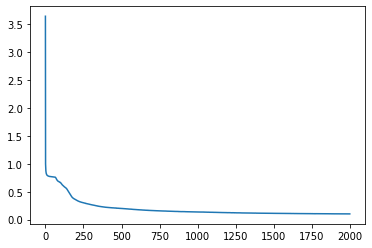

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()

# Modell speichern

In [56]:
model.save("textmodell")

2022-05-29 20:17:58.963675: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: textmodell/assets


# Modell anwenden

In [79]:
model.predict( [["i really like this dress ..."],
                ["i love love love this jumpsuit ..."],
                ["i would buy it again ..."],
                ["it was not a good decision to buy this item ..."],
                ["the design is the worst you could imagine ..."],
                ["i love similar dresses, but this one is crap"],
                ["i love similar dresses and this one is no exception"],
               ] )

array([[ 4.8076534],
       [ 4.960496 ],
       [ 4.89336  ],
       [-0.5348716],
       [ 2.1396875],
       [ 2.2305245],
       [ 5.158312 ]], dtype=float32)